## Analizando el sistema de ecobici
### Proyecto Final Mate discretas


- Acosta Imandt Daniel

- Castillo del Valle Pablo David

In [1]:
 #@title Importamos librerías
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import datetime
import sympy as sp
import statistics
import matplotlib.image as mpimg

In [2]:
 #@title Datos ecobici
 df = pd.read_csv('/content/estaciones-de-ecobici.csv')
 df.tail(5)

ID  ...             punto_geo
475  156  ...  19.407121,-99.162202
476  162  ...  19.404907,-99.162485
477  410  ...   19.36564,-99.158063
478  411  ...  19.367864,-99.163626
479  380  ...  19.374876,-99.173512

[5 rows x 18 columns]

In [3]:
#@title Los datos simplificados son
D2 = df[['Nombre', 'ID','punto_geo','Colonia','location/lat','location/lon']]
D2=D2.rename(columns={"location/lat": "latitude", "location/lon": "longitude"})
loc=D2[['latitude','longitude']]
D2.head()

Nombre   ID  ...   latitude  longitude
0               86 SULLIVAN-INSURGENTES   86  ...  19.432378 -99.159077
1           250 DARWIN-MARIANO ESCOBEDO  250  ...  19.429057 -99.179660
2  273 LUIS DONALDO COLOSIO-AV. CENTRAL  273  ...  19.442707 -99.152956
3      278 MIER Y PESADO-OBRERO MUNDIAL  278  ...  19.400710 -99.163831
4        305 AVENIDA DEL PARQUE-ARIZONA  305  ...  19.394693 -99.175531

[5 rows x 6 columns]

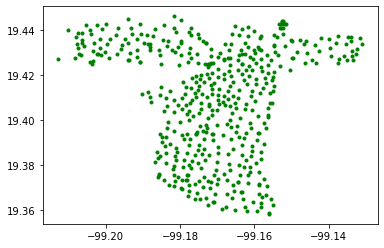

In [4]:
#@title Gráfica de localización geográfica
for i in range(len(D2)):
    y, x = np.array(D2.punto_geo[i].split(','), float)
    plt.scatter(x,y, marker = '.', color = 'g')

In [5]:
#Encontramos entre que coordenadas estan las bicicletas para sacar el mapa
coor=((D2.longitude.min(),D2.longitude.max(),D2.latitude.min(),D2.latitude.max()))
coor

(-99.212845, -99.13091800000001, 19.35827, 19.446073000000002)

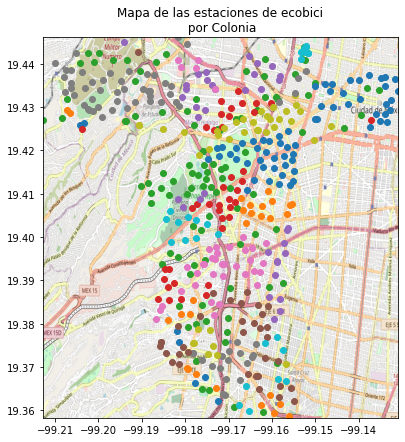

In [6]:
#@title   Mapa estaciones ecobici por colonia
fig, ax = plt.subplots(figsize = (8,7))
img = plt.imread('map.png')
plt.title('Mapa de las estaciones de ecobici\n por Colonia')
groups = D2.groupby("Colonia")
for name, group in groups:
    plt.plot(group["longitude"], group["latitude"], marker="o", linestyle="", label=name)

plt.imshow(img, zorder=0, extent = coor, aspect= 'equal')


In [7]:
#@title Datos de los viajes de enero del 2020 a abril del 2020
enero='2020-01.csv'
febrero='2020-02.csv'
marzo='2020-03 (1).csv'
abril='2020-04.csv'
enero=pd.read_csv(enero,
                    #nrows = 100000,
                    header = 0)
febrero=pd.read_csv(febrero,
                    #nrows = 100000,
                    header = 0)
marzo=pd.read_csv(marzo,
                    #nrows = 100000,
                    header = 0)
abril=pd.read_csv(abril,
                    #nrows = 100000,
                    header = 0)
abril.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Genero_Usuario  Edad_Usuario  ... Fecha_Arribo  Hora_Arribo
149113              F            27  ...   30/04/2020     23:55:49
149114              M            32  ...   30/04/2020     23:56:19
149115              M            21  ...   30/04/2020     23:58:14
149116              M            27  ...   30/04/2020     23:58:16
149117              F            42  ...   30/04/2020     23:59:31

[5 rows x 9 columns]

In [8]:
#@title Datos totales
meses = pd.concat([enero,febrero,marzo,abril], axis=0)

meses

Genero_Usuario  Edad_Usuario  ... Fecha_Arribo  Hora_Arribo
0                   F            33  ...   01/01/2020      0:13:00
1                   M            30  ...   01/01/2020      0:21:30
2                   F            36  ...   01/01/2020      0:26:10
3                   F            33  ...   01/01/2020      0:25:29
4                   M            29  ...   01/01/2020      0:24:01
...               ...           ...  ...          ...          ...
149113              F            27  ...   30/04/2020     23:55:49
149114              M            32  ...   30/04/2020     23:56:19
149115              M            21  ...   30/04/2020     23:58:14
149116              M            27  ...   30/04/2020     23:58:16
149117              F            42  ...   30/04/2020     23:59:31

[2040353 rows x 9 columns]

##Limpieza de datos
Algunos valores extraños en los datos, como es el caso de estaciones de ecobici inexistentes.Periodos de tiempo de uso muy largos,uso del servicio cuandio esta cerrado, por lo que eliminaremos todos estos casos.

In [9]:
 #@title  Notamos que hay algunos valores de  Ciclo_Estacion_Retiro y de Ciclo_Estacion_Arribo que no existen, para eliminarlos
meses.sort_values(by=['Ciclo_Estacion_Retiro'])

Genero_Usuario  Edad_Usuario  ... Fecha_Arribo  Hora_Arribo
297777              F            22  ...   12/03/2020     19:00:31
570828              M            33  ...   28/01/2020     11:21:55
154012              F            25  ...   08/02/2020     13:58:36
261077              M            53  ...   12/02/2020     20:44:11
145477              M            38  ...   06/03/2020     11:59:14
...               ...           ...  ...          ...          ...
535713              M            44  ...   24/02/2020     15:09:44
532847              M            44  ...   24/02/2020     13:15:24
449007              M            39  ...   22/01/2020     20:33:27
587876              M            40  ...   28/01/2020     21:15:47
449028              M            40  ...   22/01/2020     20:33:29

[2040353 rows x 9 columns]

In [10]:
#Eliminamos las estaciones inexistentes
meses = meses[(meses.Ciclo_Estacion_Retiro != 1002) &   (meses.Ciclo_Estacion_Arribo != 1002) &
              (meses.Ciclo_Estacion_Retiro != 3002) &   (meses.Ciclo_Estacion_Arribo != 3002)
              & (meses.Ciclo_Estacion_Retiro != 3001) &   (meses.Ciclo_Estacion_Arribo != 3001)
              & (meses.Ciclo_Estacion_Retiro != 3003) &   (meses.Ciclo_Estacion_Arribo != 3003)
              & (meses.Ciclo_Estacion_Retiro != 3000) &   (meses.Ciclo_Estacion_Arribo != 3000)]


In [11]:
# Juntamos en una sola columna el día y hora de retiro y arribo
# Borramos los datos de antes de las 5am ya que a esa hora se supone que no hay servicio
import warnings
warnings.filterwarnings("ignore")

meses['fecha_retiro']=meses["Fecha_Retiro"] + ['_']+ meses["Hora_Retiro"]
meses['fecha_arribo']=meses["Fecha_Arribo"] + ['_']+ meses["Hora_Arribo"]
meses['fecha_retiro']=meses["Fecha_Retiro"] + [' ']+ meses["Hora_Retiro"]
meses['fecha_arribo']=meses["Fecha_Arribo"] + [' ']+ meses["Hora_Arribo"]

In [12]:
#Convertimos nuestras fechas a formato datetime
meses=meses.drop(columns=['Fecha_Retiro','Hora_Retiro','Fecha_Arribo','Hora_Arribo'])
meses["fecha_retiro"] = pd.to_datetime(meses["fecha_retiro"], format='%d/%m/%Y %X')
meses["fecha_arribo"] = pd.to_datetime(meses["fecha_arribo"], format='%d/%m/%Y %X')


In [13]:
#Reiniciamos los valores del index, ya que se desfacaron alborrar datos
meses=meses.reset_index(drop=True)

In [14]:
#Creamos una nueva columna en donde vemos el tiempo total de viaje
meses['tiempo_trayecto']=(meses["fecha_arribo"] - meses["fecha_retiro"])
meses.head()

Genero_Usuario  Edad_Usuario  ...        fecha_arribo  tiempo_trayecto
0              F            33  ... 2020-01-01 00:13:00  0 days 00:07:54
1              M            30  ... 2020-01-01 00:21:30  0 days 00:11:40
2              F            36  ... 2020-01-01 00:26:10  0 days 00:12:45
3              F            33  ... 2020-01-01 00:25:29  0 days 00:10:07
4              M            29  ... 2020-01-01 00:24:01  0 days 00:05:19

[5 rows x 8 columns]

In [15]:
#Convertimos los tiempos de viaje a númerico para poder usarlos como pesos en las gráficas
meses['tiempo_trayecto']=pd.to_numeric(meses['tiempo_trayecto'])
meses.head()

Genero_Usuario  Edad_Usuario  ...        fecha_arribo  tiempo_trayecto
0              F            33  ... 2020-01-01 00:13:00     474000000000
1              M            30  ... 2020-01-01 00:21:30     700000000000
2              F            36  ... 2020-01-01 00:26:10     765000000000
3              F            33  ... 2020-01-01 00:25:29     607000000000
4              M            29  ... 2020-01-01 00:24:01     319000000000

[5 rows x 8 columns]

In [16]:
#Gráfica de solo enero
enero=meses.head(676908)
DGenero = nx.DiGraph()
edges = zip(enero.Ciclo_Estacion_Retiro, enero.Ciclo_Estacion_Arribo, enero.tiempo_trayecto)
DGenero.add_weighted_edges_from(edges,attr='mean')
DGenero.remove_edges_from(nx.selfloop_edges(DGenero))

In [17]:
#Agarramos alrededor del 1% de los datos totales
meses_prueba=meses.sample(n=1491)
meses_prueba.head()

Genero_Usuario  Edad_Usuario  ...        fecha_arribo  tiempo_trayecto
1130619              M            30  ... 2020-02-20 17:21:52    1193000000000
1964920              F            20  ... 2020-04-15 15:27:44     599000000000
718626               M            39  ... 2020-02-04 14:00:07     366000000000
1379388              F            59  ... 2020-03-02 08:56:09     482000000000
629169               M            26  ... 2020-01-30 10:34:36    1272000000000

[5 rows x 8 columns]

In [18]:
#Vemos las posiciones de cada nodo según su latitud y longitud
pos = {}
for i, j, k in zip(D2.ID,D2.latitude,D2.longitude):
    pos[i] = (k,j)

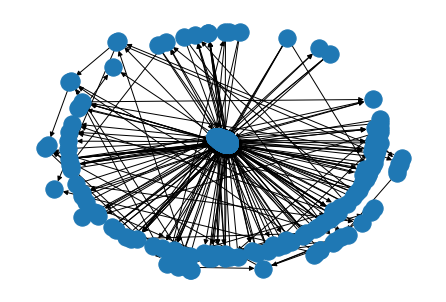

In [19]:
#Gráfica del 1% de los datos totales
DG_prueba = nx.DiGraph()
edges = zip(meses_prueba.Ciclo_Estacion_Retiro, meses_prueba.Ciclo_Estacion_Arribo, meses_prueba.tiempo_trayecto)
DG_prueba.add_weighted_edges_from(edges,attr='mean')
DG_prueba.remove_edges_from(nx.selfloop_edges(DG_prueba))
nx.draw_kamada_kawai(DG_prueba)

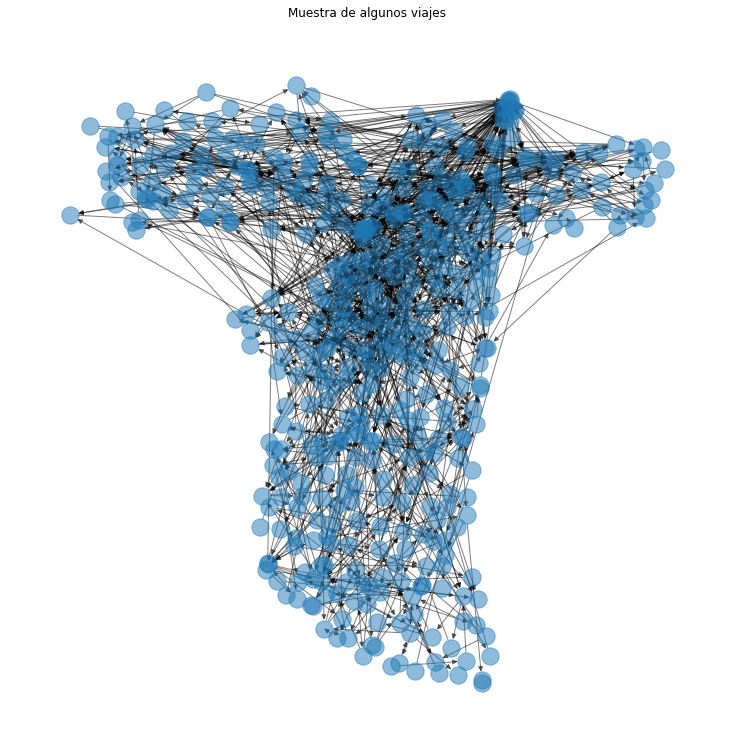

In [20]:
#Graficamos tomando en cuenta la posición de los nodos
plt.figure(figsize = (10,10))
nx.draw(DG_prueba,
                         pos=pos,
                       alpha=0.5)
plt.title('Muestra de algunos viajes')
plt.show()

In [21]:
#Gráfica de todos los datos que tenemos
DG_comp = nx.DiGraph()
edges = zip(meses.Ciclo_Estacion_Retiro, meses.Ciclo_Estacion_Arribo, meses.tiempo_trayecto)
DG_comp.add_weighted_edges_from(edges,attr='mean')
DG_comp.remove_edges_from(nx.selfloop_edges(DG_comp))

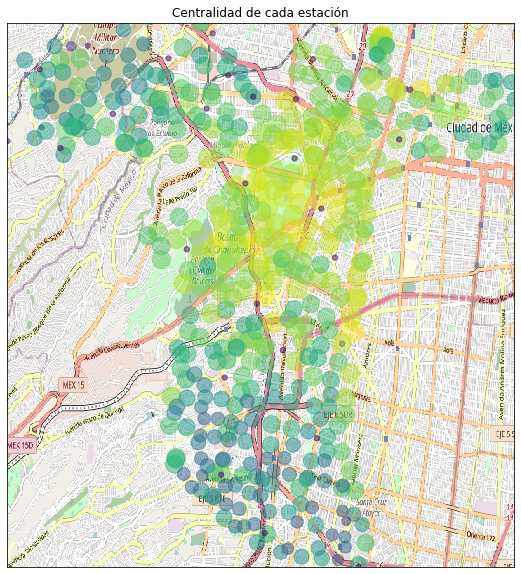

In [22]:
 
 #Vemos las medidas de centralidad de nuestra gráfica
plt.figure(figsize = (10,10))
diccionario1 = nx.degree_centrality(DG_comp)
sizes = np.array([diccionario1[i] for i in DG_comp])
diccionario2 = nx.eigenvector_centrality(DG_comp)
colors = np.array([diccionario2[i] for i in DG_comp])
nx.draw_networkx_nodes(DG_comp,
                       node_size = 250*sizes,
                       #node_size=grados,
                       cmap = 'viridis',
                       node_color =colors ,
                       pos=pos,
                       alpha=0.5)
plt.title('Centralidad de cada estación')
img = plt.imread('map.png')
coor=((D2.longitude.min(),D2.longitude.max(),D2.latitude.min(),D2.latitude.max()))
plt.imshow(img, extent=coor, interpolation='nearest')
plt.show()

In [23]:
#Notamos que la gráfica total de los nodos no es conexa ya que existen dos compoenetes
nx.is_weakly_connected(DG_comp)
nx.number_weakly_connected_components(DG_comp)

1

In [24]:
#Implementamos Dijkstra
def dijkstra(G,u,v):
    masinf=float('inf')
    vertices=list(G.nodes)
    distancias={w:masinf for w in vertices}
    fijos={w:False for w in vertices}
    padres={w:None for w in vertices}
    distancias[u]=0
    fijos[u]=True
    nuevo_fijo=u

    while not(all(fijos.values())):
        # Acualizar distancias.
        for w in G.neighbors(nuevo_fijo):
            if fijos[w]==False:
                nueva_dist=distancias[nuevo_fijo]+G[nuevo_fijo][w]['weight']
                if distancias[w]>nueva_dist:
                    distancias[w]=nueva_dist
                    padres[w]=nuevo_fijo

        # Encontrar el nuevo a fijar.
        mas_chica=masinf
        for w in vertices:
            if fijos[w]==False and distancias[w]<mas_chica:
                optimo=w
                mas_chica=distancias[w]
        nuevo_fijo=optimo
        fijos[nuevo_fijo]=True

        # Cuando fije el vértice final v, dar el camino.
        if nuevo_fijo==v:
            camino=[v]
            while camino[0]!=u:
                camino=[padres[camino[0]]]+camino
            return distancias[v], camino

In [25]:
#Creamos una función en donde le das la gráfica, tu nodo inicial y el final
#Utilizamos Dijkstra
#Vemos el peso total entre esos nodos y lo convertimos a formato de tiempo
#Mostramos la gráfica con la ruta optima a seguir
#El tamaño de los nodos dice la centralidad de grado
#El color de los nodos indica la centralidad de eigenvector
def ruta(G,ini,fin):
  D=dijkstra(G,ini,fin)
  tiempo=pd.to_timedelta(D[0])
  masinf=float('inf')
  if D[0] !=masinf:
    print('El tiempo estimado de tu viaje siguiendo la ruta recomendada es de:',tiempo,'\n y la ruta recomendada es la siguiente:')

  plt.figure(figsize = (10,10))
  diccionario1 = nx.degree_centrality(G)
  sizes = np.array([diccionario1[i] for i in G])
  diccionario2 = nx.eigenvector_centrality(G)
  colors = np.array([diccionario2[i] for i in G])
  nx.draw_networkx_nodes(G,
                       node_size = 250*sizes,
                       #node_size=grados,
                       cmap = 'viridis',
                       node_color = colors,
                       pos=pos,
                       alpha=0.5)
  '''
  nx.draw_networkx_nodes(G,
                       cmap = 'hot',
                       pos = pos
                       ,alpha=0.5)
                       '''
  Gp = nx.Graph()
  nx.add_path(Gp, D[1])
  nx.draw(Gp,pos=pos,edge_color='r',node_color='r',with_labels=True)
  img = plt.imread('map.png')
  coor=((D2.longitude.min(),D2.longitude.max(),D2.latitude.min(),D2.latitude.max()))
  plt.imshow(img, extent=coor, interpolation='nearest')
  plt.show()



In [26]:
DG_comp.has_node(4) and DG_comp.has_node(40)

True

El tiempo estimado de tu viaje siguiendo la ruta recomendada es de: 0 days 00:13:18 
 y la ruta recomendada es la siguiente:


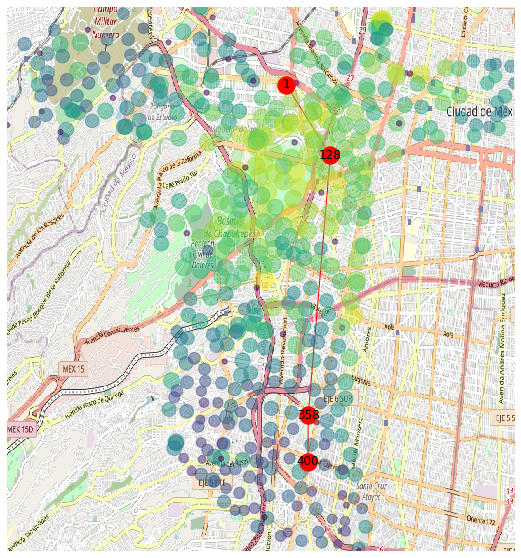

In [27]:
#LLamamos a nuestra función
ruta(DGenero,1,400)

In [28]:
edges = zip(meses.Ciclo_Estacion_Retiro, meses.Ciclo_Estacion_Arribo, meses.tiempo_trayecto)
print(meses.tiempo_trayecto)

0           474000000000
1           700000000000
2           765000000000
3           607000000000
4           319000000000
               ...      
2040176    2114000000000
2040177     168000000000
2040178     801000000000
2040179     678000000000
2040180     801000000000
Name: tiempo_trayecto, Length: 2040181, dtype: int64


In [29]:
meses.head()
df2=meses.copy()
df2["hora"]=df2["fecha_retiro"].dt.hour
df2=df2.groupby(['Ciclo_Estacion_Retiro','Ciclo_Estacion_Arribo' ,'hora'], as_index=False).mean()
df2.drop(["Edad_Usuario"], axis=1, inplace=True)
df2.head(10)

Ciclo_Estacion_Retiro  Ciclo_Estacion_Arribo  hora  tiempo_trayecto
0                      1                      1     0     1.353667e+12
1                      1                      1     1     2.030000e+11
2                      1                      1     2     2.375400e+13
3                      1                      1     5     2.065000e+11
4                      1                      1     6     6.691429e+11
5                      1                      1     7     1.395800e+12
6                      1                      1     8     1.087812e+12
7                      1                      1     9     1.270194e+12
8                      1                      1    10     1.132911e+12
9                      1                      1    11     1.142553e+12

<BarContainer object of 23 artists>

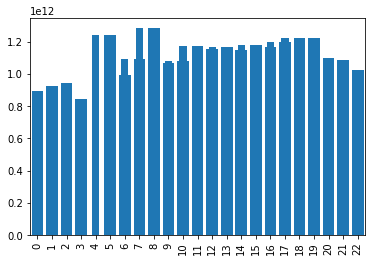

In [30]:
#@title Grafica del promedio de tiempo de los viajes por hora en todas las estaiciones
prims=df2.groupby(["hora"], as_index=False).mean()
prims.tiempo_trayecto.plot(kind="bar")
plt.bar(prims["hora"], prims["tiempo_trayecto"])

20 23


<BarContainer object of 16 artists>

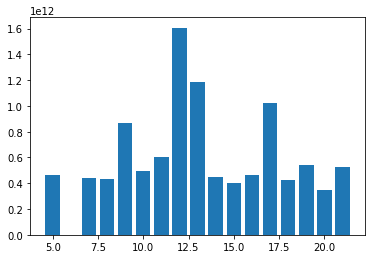

In [31]:
#@title Promedio de tiempo de viajes por hora entre dos estaciones aleatorias 
import random
inic=random.randint(0,23)
arrib=random.randint(0,23)
print(inic, arrib)
dftest=df2.loc[(df2["Ciclo_Estacion_Retiro"]==inic) & (df2["Ciclo_Estacion_Arribo"]==arrib)]
dftest=dftest.groupby(["hora"], as_index=False).mean()

plt.bar(dftest["hora"], dftest["tiempo_trayecto"])

Podemos ver que a pesar de que el tiempo promedio a la hora del día en cualquier estación es uniforme, al considerar dos estaciones es evidente que varía dependiendo del tiempo.

Esto nos lleva a pensar que podemos optimizar nuestra predicción si tomamos en cuenta la hora del día a la que se se solicita la predicción

<h1>Algoritmo 2</h1>

Ahora en lugar de usar Djikstra, la idea será encontrar todos los caminos posibles entre dos nodos.

Posteriormente como ya tenemos el tiempo promedio por hora entre dos estaciones dadas, solamente sería calcular el tiempo promedio por hora que tardaremos en recorrer cada camino.

Esto lo almacenaremos en un dataframe y cuando se nos pida calcular el tiempo estimado de arribo, lo que haremos será simplemente mostrar el más óptimo



---

Edit: Al intentar correr el algoritmo, tuvimos problemas, por dos razones, primero la capacidad limitada de nuestra memoria ram derivada de las limitaciones de la platadforma de google colab y de las limitaciones de nuestro propio equipo.

Esto nos llevaba a comprobar que tan eficiente es nuestro algoritmo, probaremos para una pequeña muestra y compararemos los tiempos de ejecución.

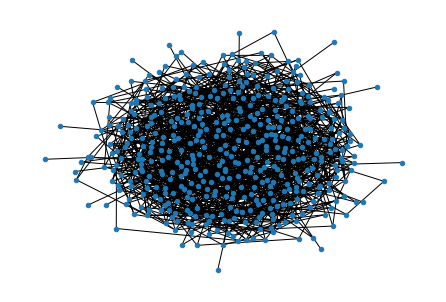

In [32]:
#@title Muestra de nuestro dataset
df3=df2.copy()
c_maxes = df3.groupby(['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']).tiempo_trayecto.transform(max)
df3 = df3.loc[df3.tiempo_trayecto == c_maxes]
df3.drop(["tiempo_trayecto", "hora"], axis=1, inplace=True)
df3
edg=df3.to_numpy()
dftest2=df3.sample(n=1491)
edgtest=dftest2.to_numpy()
G_prueba = nx.Graph()
G_prueba.add_edges_from(edgtest)
G_prueba.remove_edges_from(nx.selfloop_edges(G_prueba))
nx.draw_kamada_kawai(G_prueba, node_size=20, width=1)

In [33]:
pat=[]
paths=[]
def FindAllPaths(inicio, final):
  if(len(pat)==0):
    pat.append(inicio)
  vecinos=[i for i in nx.all_neighbors(Gr, inicio)]
  for nextnode in vecinos:
    if(nextnode == final):
      temporary=[]
      for node1 in pat:  
        temporary.append(node1)
      temporary.append(final)
      paths.append(temporary)
    elif(nextnode not in pat):
      pat.append(nextnode)
      FindAllPaths(nextnode, final)
      pat.pop()

Veamos que nuestro algoritmo funciona

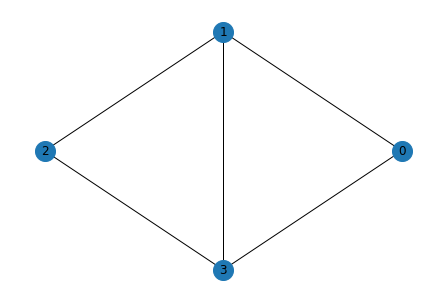

In [34]:
m = 4
p = 0.5
Gr = nx.gnp_random_graph(m, p)
nx.draw_kamada_kawai(Gr, node_size=400, width=1, with_labels=True)

In [35]:
allpaths=[]
for j in range(0,m):
  for i in range(0,m):
    print(f"Caminos para los nodos {i},{j}")
    pat=[]
    paths=[]
    FindAllPaths(i,j)
    print(paths)
    allpaths.append(paths)

Caminos para los nodos 0,0
[[0, 1, 0], [0, 1, 2, 3, 0], [0, 1, 3, 0], [0, 3, 0], [0, 3, 1, 0], [0, 3, 2, 1, 0]]
Caminos para los nodos 1,0
[[1, 0], [1, 2, 3, 0], [1, 3, 0]]
Caminos para los nodos 2,0
[[2, 1, 0], [2, 1, 3, 0], [2, 3, 0], [2, 3, 1, 0]]
Caminos para los nodos 3,0
[[3, 0], [3, 1, 0], [3, 2, 1, 0]]
Caminos para los nodos 0,1
[[0, 1], [0, 3, 1], [0, 3, 2, 1]]
Caminos para los nodos 1,1
[[1, 0, 1], [1, 0, 3, 1], [1, 0, 3, 2, 1], [1, 2, 1], [1, 2, 3, 0, 1], [1, 2, 3, 1], [1, 3, 0, 1], [1, 3, 1], [1, 3, 2, 1]]
Caminos para los nodos 2,1
[[2, 1], [2, 3, 0, 1], [2, 3, 1]]
Caminos para los nodos 3,1
[[3, 0, 1], [3, 1], [3, 2, 1]]
Caminos para los nodos 0,2
[[0, 1, 2], [0, 1, 3, 2], [0, 3, 1, 2], [0, 3, 2]]
Caminos para los nodos 1,2
[[1, 0, 3, 2], [1, 2], [1, 3, 2]]
Caminos para los nodos 2,2
[[2, 1, 0, 3, 2], [2, 1, 2], [2, 1, 3, 2], [2, 3, 0, 1, 2], [2, 3, 1, 2], [2, 3, 2]]
Caminos para los nodos 3,2
[[3, 0, 1, 2], [3, 1, 2], [3, 2]]
Caminos para los nodos 0,3
[[0, 1, 2, 3], [0,

Notemos que además ignoramos ciclos, ya que esto hace potencialmente infinitos los caminos

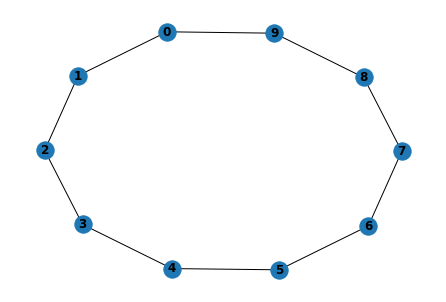

In [36]:
Gr = nx.Graph()
n = 10
for i in range(n):
    Gr.add_edge(i, (i+1)%n)
nx.draw(Gr,with_labels=True,font_weight='bold')



In [37]:
allpaths=[]
for j in range(0,m):
  for i in range(0,m):
    print(f"Caminos para los nodos {i},{j}")
    pat=[]
    paths=[]
    FindAllPaths(i,j)
    print(paths)
    allpaths.append(paths)

Caminos para los nodos 0,0
[[0, 1, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0], [0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], [0, 9, 0]]
Caminos para los nodos 1,0
[[1, 0], [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]]
Caminos para los nodos 2,0
[[2, 1, 0], [2, 3, 4, 5, 6, 7, 8, 9, 0]]
Caminos para los nodos 3,0
[[3, 2, 1, 0], [3, 4, 5, 6, 7, 8, 9, 0]]
Caminos para los nodos 0,1
[[0, 1], [0, 9, 8, 7, 6, 5, 4, 3, 2, 1]]
Caminos para los nodos 1,1
[[1, 0, 1], [1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1]]
Caminos para los nodos 2,1
[[2, 1], [2, 3, 4, 5, 6, 7, 8, 9, 0, 1]]
Caminos para los nodos 3,1
[[3, 2, 1], [3, 4, 5, 6, 7, 8, 9, 0, 1]]
Caminos para los nodos 0,2
[[0, 1, 2], [0, 9, 8, 7, 6, 5, 4, 3, 2]]
Caminos para los nodos 1,2
[[1, 0, 9, 8, 7, 6, 5, 4, 3, 2], [1, 2]]
Caminos para los nodos 2,2
[[2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2], [2, 1, 2], [2, 3, 2], [2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2]]
Caminos para los nodos 3,2
[[3, 2], [3, 4, 5, 6, 7, 8, 9, 0, 1, 2]]
Caminos para los nodos 0,3
[

In [38]:
import time 
times=[]
for i in range(0,300, 10): 
  df3=df2.copy()
  c_maxes = df3.groupby(['Ciclo_Estacion_Retiro', 'Ciclo_Estacion_Arribo']).tiempo_trayecto.transform(max)
  df3 = df3.loc[df3.tiempo_trayecto == c_maxes]
  df3.drop(["tiempo_trayecto", "hora"], axis=1, inplace=True)
  df3
  dftest2=df3.sample(i)
  edgtest=dftest2.to_numpy()
  Gr = nx.Graph()
  Gr.add_edges_from(edgtest)
  Gr.remove_edges_from(nx.selfloop_edges(Gr))
  allpaths=[]
  start = time.perf_counter()
  for e in edgtest:
    pat=[]
    paths=[]
    FindAllPaths(e[0],e[1])
    allpaths.append(paths)
  end = time.perf_counter()
  print(f"Tiempo en encontrar todos los caminos de una muestra de tamaño {i} {round(end - start, 5)} seconds(s)")
  times.append(round(end - start, 5))

Tiempo en encontrar todos los caminos de una muestra de tamaño 0 0.0 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 10 4e-05 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 20 7e-05 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 30 9e-05 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 40 0.00014 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 50 0.0002 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 60 0.00023 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 70 0.00027 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 80 0.00031 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 90 0.00033 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 100 0.00041 seconds(s)
Tiempo en encontrar todos los caminos de una muestra de tamaño 110 0.00045 s

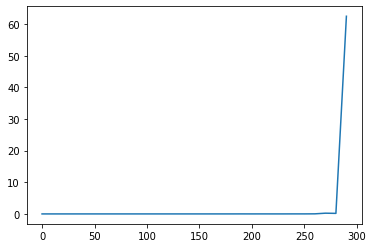

In [39]:
plt.plot(np.arange(0,300,10), times)

Al no funcionar esta idea lo que haremos a continuación vemos las rutas más optimas dependiendo del día

In [40]:
horas_graph=[]
import random
for i in range(0,23):
  dfhoras=df2.loc[(df2["hora"]==i)]
  DG_comph = nx.DiGraph()
  edges = zip(dfhoras.Ciclo_Estacion_Retiro, dfhoras.Ciclo_Estacion_Arribo, dfhoras.tiempo_trayecto)
  DG_comph.add_weighted_edges_from(edges,attr='mean')
  DG_comph.remove_edges_from(nx.selfloop_edges(DG_comph))
  horas_graph.append(DG_comph)

A las 9:00 horas
El tiempo estimado de tu viaje siguiendo la ruta recomendada es de: 0 days 00:07:21 
 y la ruta recomendada es la siguiente:


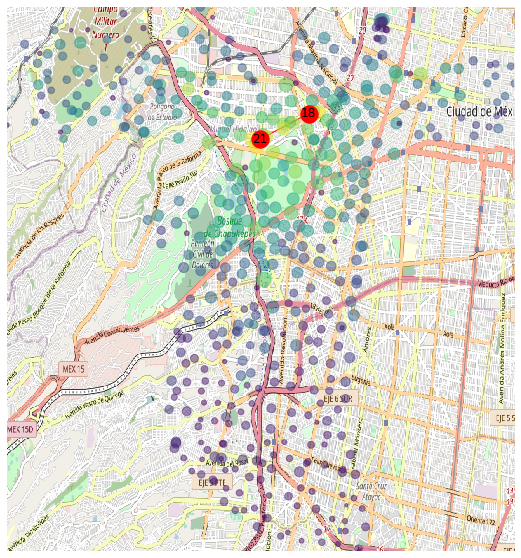

In [41]:
inic=random.randint(0,23)
arrib=random.randint(0,23)
hora_del_día=9
print(f"A las {hora_del_día}:00 horas")
ruta(horas_graph[hora_del_día],inic,arrib)

El tiempo estimado de tu viaje siguiendo la ruta recomendada es de: 0 days 00:05:16 
 y la ruta recomendada es la siguiente:


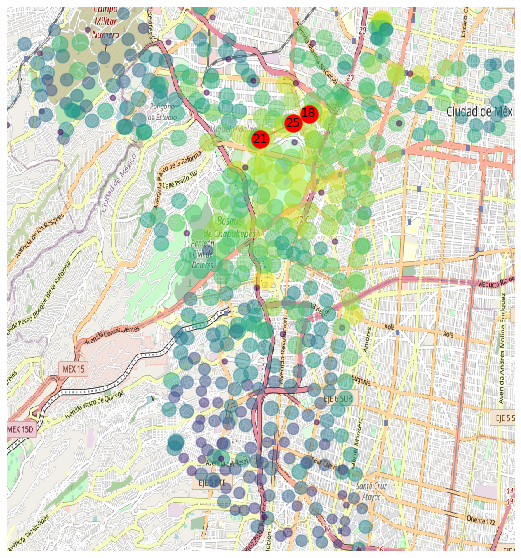

In [42]:
ruta(DGenero,inic,arrib)